<a href="https://colab.research.google.com/github/bboszori/ds_assesment/blob/main/02_Statistics_HW_student_bboszori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bds_courseware

# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

from google.colab import drive
drive.mount('/content/drive/')

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

### Formulas:

#### Stratified sample point estimations:

#### **random selection from the entire population**

The point estimate of the mean for the entire population can be calculated as the sample mean of the randomly selected observations.

$$
\hat{\mu} = \frac{\sum\bar{x}_i}{n}
$$

The point estimate of the variance can be calculated using the sample variance formula $s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

$$
\hat{\sigma}^2 = \frac{\sum{s}_i^2}{n}
$$


#### **random selection of strata in proportion to strata volumes**
The point estimate of the variance can be calculated as the weighted average of the stratum means, where the weights are proportional to the stratum volumes.

$$
\hat{\mu} = \frac{\sum(\hat{\mu}_i \cdot V_i)}{\sum V_i}
$$


The point estimate of the variance can be calculated as the weighted average of the stratum variances, where the weights are proportional to the stratum volumes.

$$
\hat{\sigma}^2 = \frac{\sum(s_i^2 \cdot V_i)}{\sum V_i}
$$

#### **random selection according to the optimal sub-sampling**
To estimate the overall population mean, we take the weighted average of the stratum means, where the weights are proportional to the inverse of the stratum variances.

$$
\hat{\mu} = \frac{\sum(\hat{\mu}_i \cdot \frac{1}{s_i^2})}{\sum \frac{1}{s_i^2}}
$$

The point estimate of the variance can be calculated using the formula for the estimated variance of a stratified sample. It involves the variances and sample sizes of the strata, as well as the correlations between the strata.

#### Sample volumes if they are sampled proportionally:

For stratified proportional random sampling, we need to use the following formula for calcualte sample volume to stratum i:

$$
V_i = \left(\frac{N_i}{N}\right) \cdot n
$$

where

* $N_i$ is the population size of stratum i
* $N$ is the total population size and
* $n$ is the desired sample size for the entire population


#### Sample volumes if they are optimal sampled (Neyman's method):

For optimal sampling we can use the following formula to calculate the sample volume for stratum i:

$$
V_i = \left(\frac{N_i \cdot \sigma_i}{\sum(N_j \cdot \sigma_j)}\right) \cdot n
$$

where

* $N_i$ is the population size of stratum i
* $\sigma_i$ is the SD for stratum i
* $\sum(N_j \cdot \sigma_j)$ is the total population size of strata * SD for strata
* $n$ is the desired sample size for the entire population


The sample volume for each stratum is determined based on the inverse of the product of the stratum size and its standard deviation, that allows higher variability

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
class GeneralPopulation:

  def __init__(self,
               means: [float],
               stds: [float],
               sizes: [int],
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions

    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata

        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]

        # number of strata
        self.count_strats = len(sizes)

        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]

        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)

        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population

      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size)
      return rc

  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata

      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]

      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))

      return rc

  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata

      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]

      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')

      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))

      return rc

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results

      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []

      if(len(self.general_samples)<100):
          n_sub = 20

      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)

              mean = rc.sum()/len(rc)
              means_s.append(mean)

      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)

              strats_mean = []

              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))

              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

      return means_s

In [ ]:
sampling_methods = {'Random':'random_subsampling','Proportional':'proportional_subsampling', 'Optimal':'optimal_subsampling'}

Function for histogram plot:

In [ ]:
def showGPDist(gp: GeneralPopulation):
  """HERE IS YOUR CODE
  It should be implemented as follows:
  * Takes a GeneralPopulation class instance;
  * Uses matplotlib or seaborn packages to plot distribution for general population;
  * Don't forget a title, grid etc.
  """

  plt.figure(figsize=(12,5))
  sns.set_style("whitegrid")
  sns.histplot(data=gp.general_samples, kde=True).set(title='Distribution of general population')

Function for plotting Boxplots for sample mean:

In [ ]:
def boxplotSampleMean(gp: GeneralPopulation):
  """HERE IS YOUR CODE
  It should be implemented as follows:
  * Takes a GeneralPopulation class instance;
  * Runs method `run_experiments` for each sampling method and gets vector of mean values;
  * Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
  * Axis Y == Mean values; Axis X == subsampling methods;
  * Don't forget a title, grid etc.
  """
  data = []
  for method in sampling_methods:
    data.append(gp.run_experiments(N_SUBSAMPLE, sampling_methods.get(method)))

  plt.figure(figsize=(12,5))
  sns.set_style("whitegrid")
  sns.boxplot(data=data).set(xticklabels=list(sampling_methods.keys()), ylabel='sample means', title='Sample means - comparison of subsampling methods')

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [ ]:
gp_equal_mean_std = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
gp_diff_mean_equal_std = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
gp_equal_mean_diff_std = GeneralPopulation(**EQUAL_MEAN_DIFFERENT_STDS_ARGS)
gp_diff_mean_std = GeneralPopulation(**DIFFERENT_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

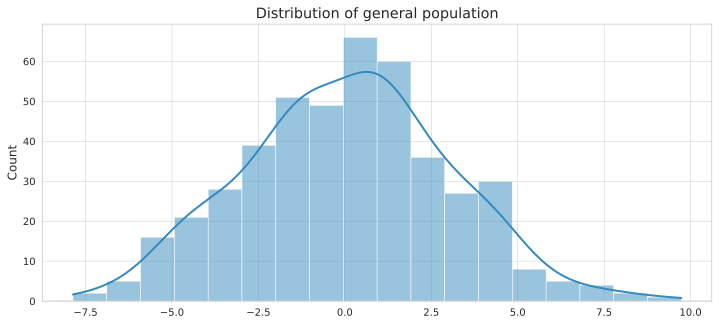

In [ ]:
# Run plotting for density
showGPDist(gp_equal_mean_std)

Boxplots for sample mean:

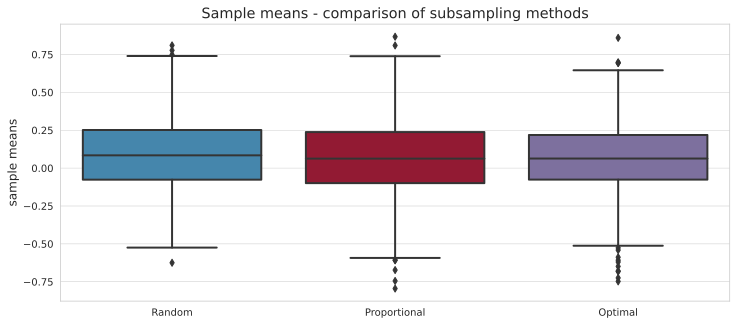

In [ ]:
# Run plotting for boxplots
boxplotSampleMean(gp_equal_mean_std)

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

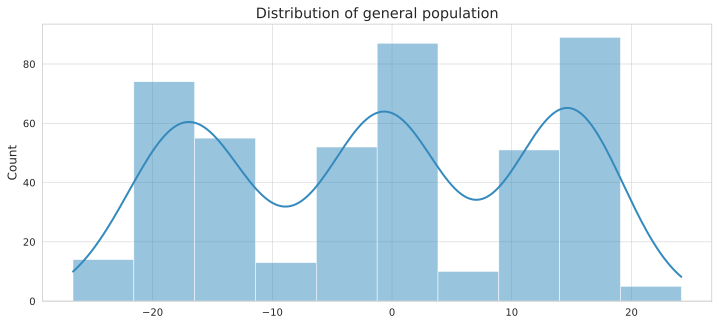

In [ ]:
# Run plotting for density
showGPDist(gp_diff_mean_equal_std)

Boxplots for sample mean:

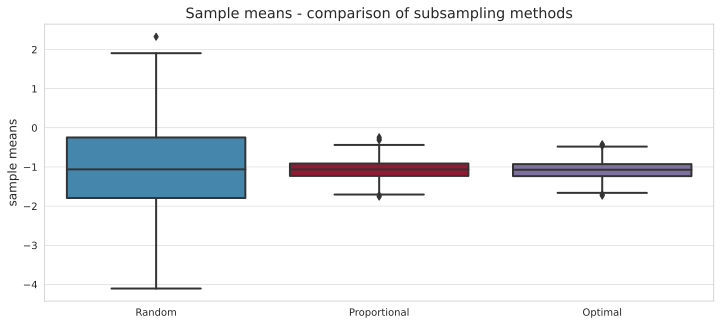

In [ ]:
# Run plotting for boxplots
boxplotSampleMean(gp_diff_mean_equal_std)

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

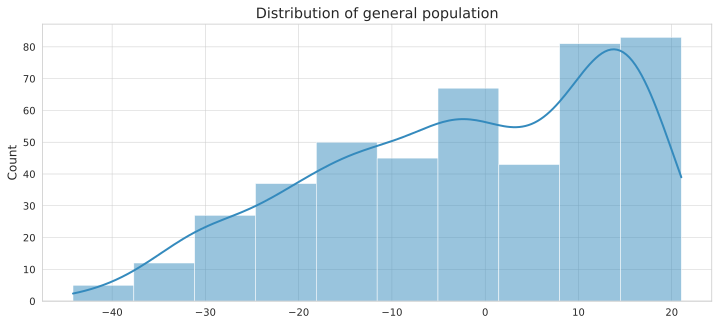

In [ ]:
# Run plotting for density
showGPDist(gp_diff_mean_std)

Boxplots for sample mean:

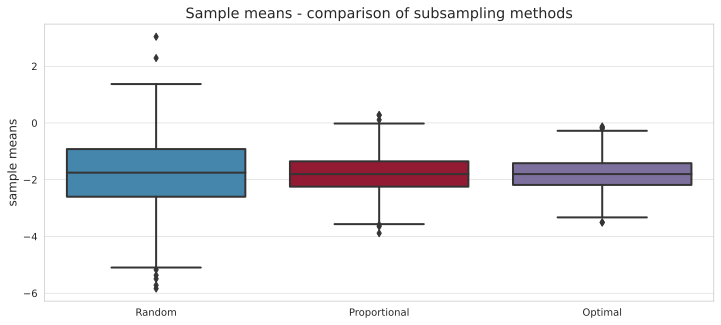

In [ ]:
# Run plotting for boxplots
boxplotSampleMean(gp_diff_mean_std)

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>:
* In the case of equal means and variances, we can't see significant difference between the distribution of sample mean for the 3 subsampling methods.
* When the general population has different means but equal STDs, we can see that the sample means from random sampling are more spread out. For proportional and optimal subsampling the variance is lower.
* The same we can see for diffwerent mean and variance in general population. In the case of random sampling, we have higher variance of sample means, and more likely to produce outliers. For proportional and optimal subsampling we can't see significant difference.




# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)


You can download dataset using the following:

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

### Part 1

1. Gender: Male or Female
2. **FSIQ**: Full Scale IQ scores based on the four Wechsler (1981) subtests
3. **VIQ**: Verbal IQ scores based on the four Wechsler (1981) subtests
4. **PIQ**: Performance IQ scores based on the four Wechsler (1981) subtests
5. **Weight**: body weight in pounds
6. **Height**: height in inches
7. MRI_Count: total pixel Count from the 18 MRI scans


In [ ]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [ ]:
brain_data.shape

(40, 7)

In [ ]:
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     int64 
 2   VIQ        40 non-null     int64 
 3   PIQ        40 non-null     int64 
 4   Weight     40 non-null     object
 5   Height     40 non-null     object
 6   MRI_Count  40 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


We can see some instaces in Weight, where we have special charachter (?).
As we have only 2 cases, I remove these rows.

In [ ]:
brain_data = brain_data[brain_data['Weight'].str.isalnum()]

In [ ]:
brain_data['Weight'].str.isalnum().sum()

38

In [ ]:
# Setting right types
brain_data['Weight'] = brain_data['Weight'].astype(int)
brain_data['Height'] = brain_data['Height'].astype(np.float64)

In [ ]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545
5,Female,99,90,110,146,69.0,928799


In [ ]:
brain_data.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01
mean,113.552632,112.131579,111.342105,151.052632,68.421053,9.067542e+05
std,23.815391,22.939605,22.597867,23.478509,3.993790,7.256175e+04
min,77.000000,71.000000,72.000000,106.000000,62.000000,7.906190e+05
25%,90.250000,90.250000,89.250000,135.250000,66.000000,8.548115e+05
50%,116.500000,113.000000,115.000000,146.500000,68.000000,9.053990e+05
75%,135.000000,129.000000,128.000000,172.000000,70.375000,9.495405e+05
max,144.000000,150.000000,150.000000,192.000000,77.000000,1.079549e+06


In [ ]:
numerical_features = brain_data.select_dtypes('number').columns
numerical_features

Index(['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

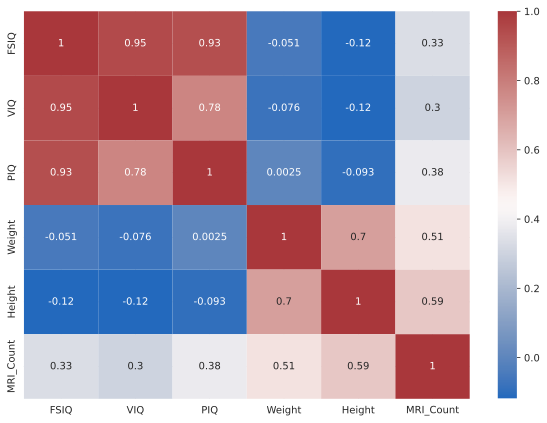

In [ ]:
corrmat = brain_data[numerical_features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, cmap='vlag', annot = True);

We can see strong correlation between the different IQ types.

Height and weight is also positively correlated with the brain size.

Between brain size and different IQ types, we can see a weak positive correlation.

In [ ]:
brain_data.groupby('Gender')[numerical_features].mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.900000,109.450000,110.450000,137.200000,65.765000,862654.600000
Male,115.388889,115.111111,112.333333,166.444444,71.372222,955753.722222


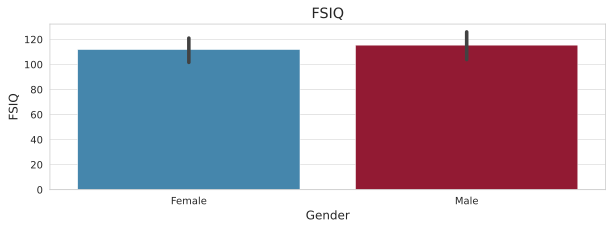

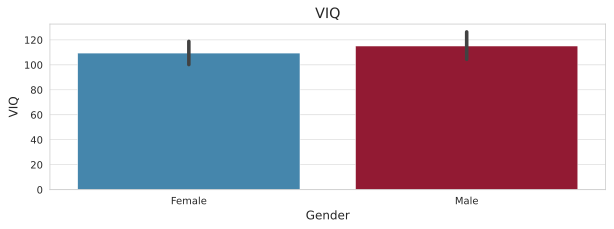

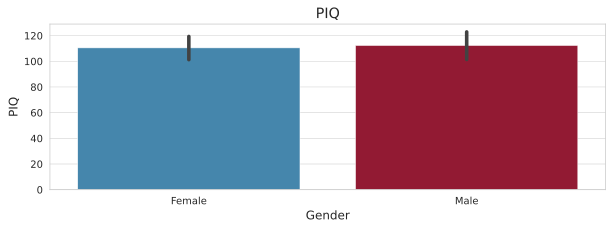

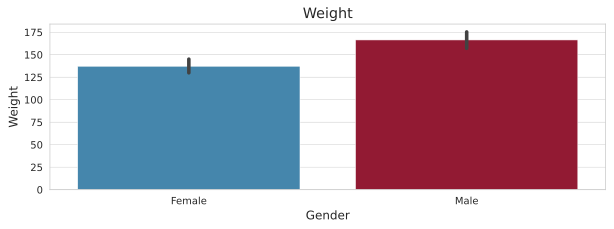

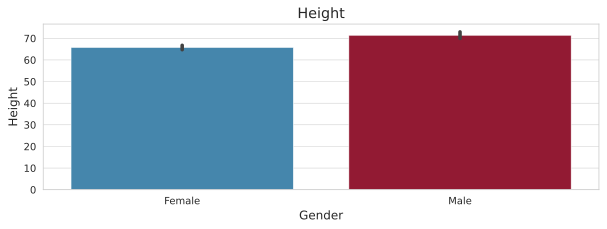

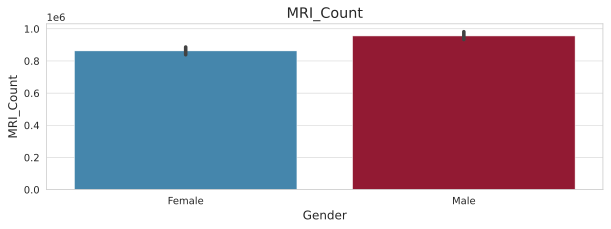

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  graph = sns.barplot(y=col, data = brain_data, x='Gender',estimator=np.mean).set(title=col)

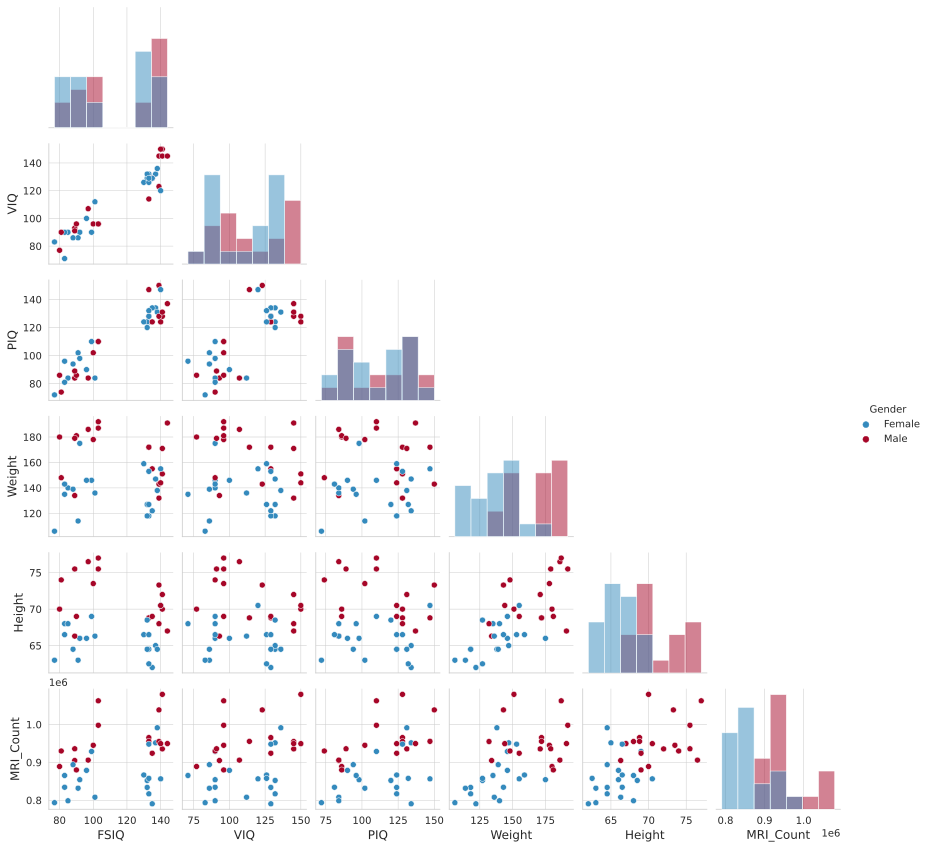

In [ ]:
sns.pairplot(data=brain_data, hue='Gender',diag_kind="hist", corner=True, height=2)

In [ ]:
st.pearsonr(x=brain_data['FSIQ'], y=brain_data['MRI_Count'])

PearsonRResult(statistic=0.3337137045273217, pvalue=0.04060489410502002)

Based the Pearson correlation coefficient, we can see a weak positive correlation between the brain size and IQ, and with 95% confidence level, it's statistically significant.

In [ ]:
st.pearsonr(x=brain_data[brain_data.Gender=='Female']['FSIQ'], y=brain_data[brain_data.Gender=='Female']['MRI_Count'])

PearsonRResult(statistic=0.3256967004963704, pvalue=0.1611157761890762)

In [ ]:
st.pearsonr(x=brain_data[brain_data.Gender=='Male']['FSIQ'], y=brain_data[brain_data.Gender=='Male']['MRI_Count'])

PearsonRResult(statistic=0.43138804337533904, pvalue=0.07386102697793245)

If we examine the data seperatelly by gender, we can see a stronger correlation between brain size and IQ in the case of men. Though, this value is statistically not significant, because of the 0.07 p-value.

In [ ]:
def checkNormality(data, alpha=0.05):
  stat, p = st.shapiro(data)

  if p > alpha:
    return True
  else:
    return False

In [ ]:
print(checkNormality(brain_data['FSIQ']))

False


In [ ]:
print(checkNormality(brain_data['MRI_Count']))

True


We can see, that FSIQ's distirbution is not normal. So I tried to calculate the Spearman correlation coefficent, too.

In [ ]:
st.spearmanr(brain_data['FSIQ'], brain_data['MRI_Count'])

SignificanceResult(statistic=0.44997313233874026, pvalue=0.004589321974323281)

In this case we can see a stronger correlation, than for the Pearson coefficient. But it is still only moderate.

### Part 2

In [ ]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [ ]:
cars_prefes_data.shape

(300, 22)

In [ ]:
cars_prefes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         300 non-null    int64
 1   Age        300 non-null    int64
 2   Sex        300 non-null    int64
 3   LicYr      300 non-null    int64
 4   LicMth     300 non-null    int64
 5   ActCar     300 non-null    int64
 6   Kids5      300 non-null    int64
 7   Kids6      300 non-null    int64
 8   PreferCar  300 non-null    int64
 9   Car15K     300 non-null    int64
 10  Reason     300 non-null    int64
 11  Cost       300 non-null    int64
 12  Reliable   300 non-null    int64
 13  Perform    300 non-null    int64
 14  Fuel       300 non-null    int64
 15  Safety     300 non-null    int64
 16  AC/PS      300 non-null    int64
 17  Park       300 non-null    int64
 18  Room       300 non-null    int64
 19  Doors      300 non-null    int64
 20  Prestige   300 non-null    int64
 21  Colour     300 n

In [ ]:
def chartDistributionBySex(col):
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  graph = sns.countplot(x=col, data = cars_prefes_data, hue='Sex').set(title=col)

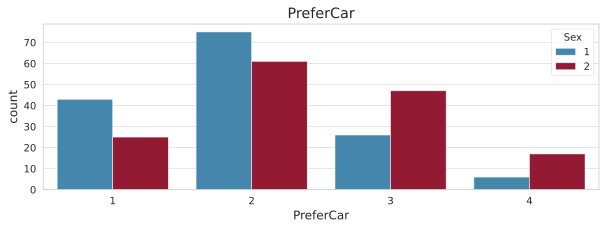

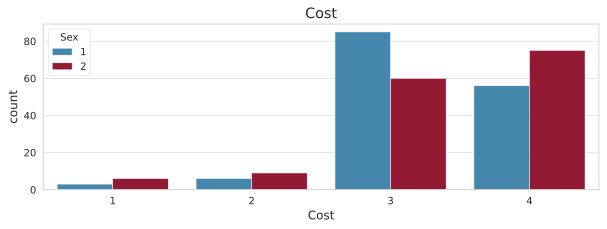

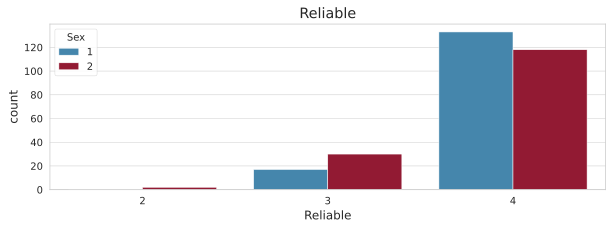

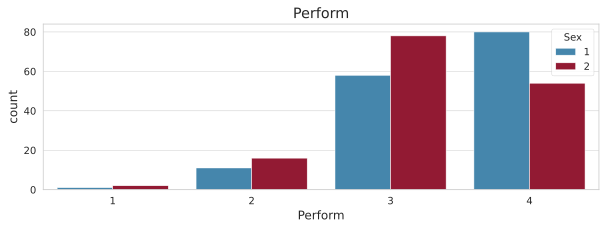

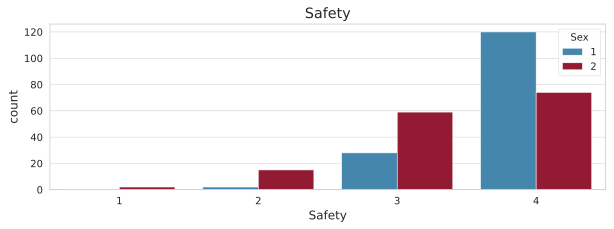

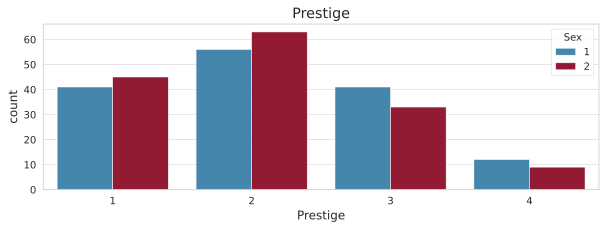

In [ ]:
columns = ['PreferCar','Cost','Reliable','Perform','Safety','Prestige']

for col in columns:
  chartDistributionBySex(col)

[Text(0.5, 1.0, 'Age distribution by sex')]

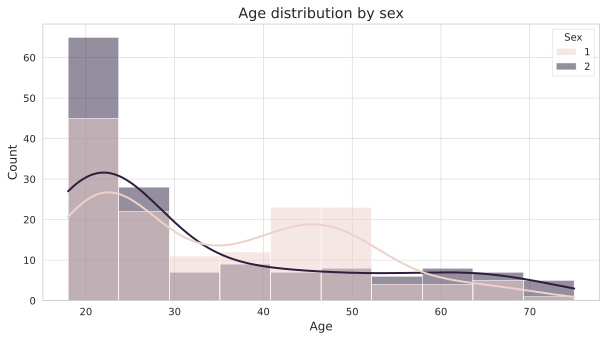

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.histplot(x='Age', data = cars_prefes_data, hue='Sex',kde=True).set(title='Age distribution by sex')

In [ ]:
obs = pd.crosstab(cars_prefes_data['Sex'], cars_prefes_data['PreferCar'])

<Axes: xlabel='PreferCar', ylabel='Sex'>

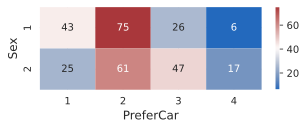

In [ ]:
plt.figure(figsize=(5,1.5))
sns.set_style("whitegrid")
sns.heatmap(obs, annot=True, cmap='vlag')

In [ ]:
res = st.chi2_contingency(obs)

In [ ]:
print(f'Statistic: {res.statistic}')
print(f'P-value: {res.pvalue}')
print(f'Degrees of freedom: {res.dof}')

Statistic: 17.507847808569526
P-value: 0.0005555699275518034
Degrees of freedom: 3


**H0:** there is no statistical relationship between Gender and PreferCar

**H1:** there is a statistical relationship between Gender and PreferCar

Based on the results, with sifgnificance level 0.05, we can reject the null hypotheses. And accept, that there is a relationship between Gender and PreferCar.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science_mentoring/03_statistics/homework/master.csv')

In [ ]:
data.shape

(27820, 12)

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
data.drop(columns=['HDI for year'], inplace=True)

In [ ]:
continuous_features = data.select_dtypes('number').columns
categorical_features = data.select_dtypes('object').columns

In [ ]:
for c in categorical_features:
  print(data[c].value_counts())
  print("_"*30)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
______________________________
male      13910
female    13910
Name: sex, dtype: int64
______________________________
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64
______________________________
Albania1987     12
Poland1993      12
Panama2009      12
Panama2010      12
Panama2011      12
                ..
Austria2016     10
Croatia2016     10
Hungary2016     10
Armenia2016     10
Mongolia2016    10
Name: country-year, Length: 2321, dtype: int64
______________________________
2,156,624,900      12
96,045,645,026     12
27,11

In [ ]:
data.rename(columns={"suicides/100k pop":"suicides_100k_pop", " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita"}, inplace=True)

In [ ]:
data["gdp_for_year"] = data["gdp_for_year"].str.replace(",","").astype(int)
data["age"] = data["age"].str.replace("5-14 years","05-14 years")

In [ ]:
data['year'].nunique()

32

In [ ]:
data.groupby('country')['country-year'].nunique().sort_values()

country
Cabo Verde                 1
Mongolia                   1
Macau                      1
Dominica                   1
Bosnia and Herzegovina     2
                          ..
Brazil                    31
Mauritius                 32
Iceland                   32
Netherlands               32
Austria                   32
Name: country-year, Length: 101, dtype: int64

1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

### Data for the Republic of Korea

In [ ]:
data_korea = data[data['country']=='Republic of Korea']

[Text(0.5, 1.0, 'Suicide numbers by sex and age')]

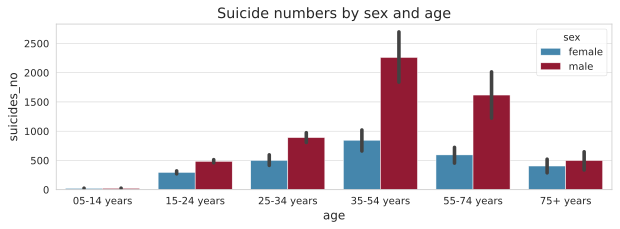

In [ ]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.barplot(y="suicides_no", x='age', data = data_korea.sort_values(by='age'), hue='sex', estimator=np.mean).set(title=f'Suicide numbers by sex and age')

We can see, that in the 35-54 years age group is the highest of the number of suicides. We can see, that in almost every age group, males commit suicide on a higher number.

In [ ]:
def chartDistributionofSuicide(col):
  plt.figure(figsize=(15,5))
  sns.set_style("whitegrid")
  sns.lineplot(y="suicides_no", x='year', data = data_korea, hue=col, markers=True, errorbar=None).set(title=f'Suicide numbers by year and {col}')

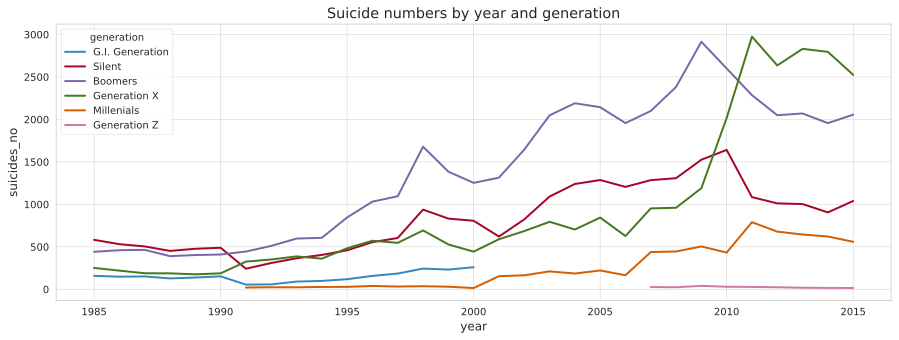

In [ ]:
chartDistributionofSuicide('generation')

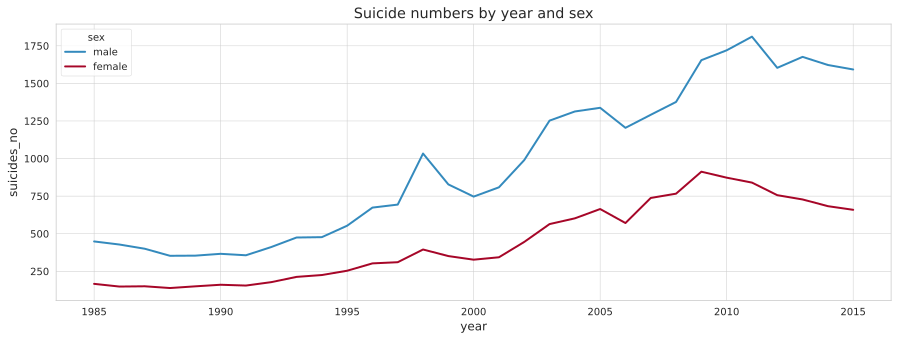

In [ ]:
chartDistributionofSuicide('sex')

In [ ]:
stat, pvalue = st.ttest_ind(data_korea[data_korea['sex']=='male']['suicides_no'], data_korea[data_korea['sex']=='female']['suicides_no'])

In [ ]:
stat

6.296959061300889

In [ ]:
'{0:.10f}'.format(pvalue)

'0.0000000009'

To check, whether there is any statistical difference betwwen males and females I used t test.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

With high t value, and very small p value. We can say that there is a statistically significant disfference between the two groups (male/female).

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
data_2016 = data[data['year']==2016]

In [ ]:
data_2016['country'].nunique()

16

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Armenia'),
  Text(1, 0, 'Austria'),
  Text(2, 0, 'Croatia'),
  Text(3, 0, 'Cyprus'),
  Text(4, 0, 'Czech Republic'),
  Text(5, 0, 'Grenada'),
  Text(6, 0, 'Hungary'),
  Text(7, 0, 'Iceland'),
  Text(8, 0, 'Lithuania'),
  Text(9, 0, 'Mauritius'),
  Text(10, 0, 'Mongolia'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Qatar'),
  Text(13, 0, 'Romania'),
  Text(14, 0, 'Sweden'),
  Text(15, 0, 'Thailand')])

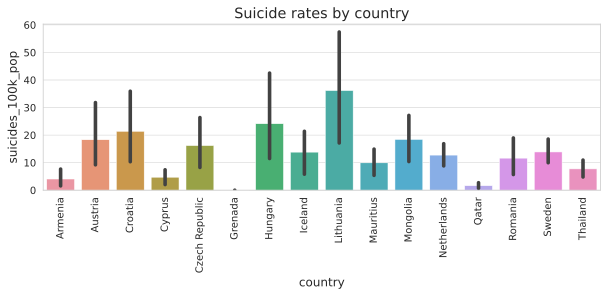

In [ ]:
plt.figure(figsize=(10,3))
sns.set_style("whitegrid")
sns.barplot(y="suicides_100k_pop", x='country', data = data_2016, estimator=np.mean).set(title=f'Suicide rates by country')
plt.xticks(rotation=90)

* For 2016, we have data only for 16 countries.
* I divided the countries to 4 groups by the quartiles of gdp/capita.

* I also divided my test by different age groups. As they have significant differences and charachteristics.

* I am using 1-way ANOVA for testing the difference between the groups by GDP.

For ANoVA we need to check wether the data is normally distributed and the variance homogene.

For homogeneity I used Levene test.
For normality, there were some groups with very low number. So I didn't checked it in this case.

In [ ]:
def createGroupsByGDP(df, age_group):
  countries = df[df['age']==age_group]
  countries['gdp_quartile'] = pd.cut(countries['gdp_per_capita ($)'],4,labels=[1,2,3,4])
  groups = [countries.loc[countries.gdp_quartile == i, :] for i in range(1,5)]
  groups_mean = [groups[i].groupby('country')['suicides_100k_pop'].mean() for i in range(4)]

  return groups_mean


def checkVarhomogeneity(data, alpha=0.05):
  stat, pvalue = st.levene(*data)

  #The small p-value suggests that the populations do not have equal variances.
  return pvalue > alpha


def testAnova(data, alpha=0.05):
  stat, pvalue = st.f_oneway(*data)
  if pvalue <= alpha:
    print("H0 rejected. Sample means are not equal")
  else:
    print("H0 not rejected. Sample means are equal")

In [ ]:
for age_group in data_2016['age'].unique():
  print(f'ANOVA test for {age_group}')
  data = createGroupsByGDP(data_2016, age_group)
  if checkVarhomogeneity(data):
    testAnova(data)
  else:
    print('Group variances not equal. ANOVA not calculated')

  print("_"*30)

ANOVA test for 75+ years
H0 not rejected. Sample means are equal
______________________________
ANOVA test for 55-74 years
H0 not rejected. Sample means are equal
______________________________
ANOVA test for 35-54 years
H0 not rejected. Sample means are equal
______________________________
ANOVA test for 15-24 years
H0 not rejected. Sample means are equal
______________________________
ANOVA test for 25-34 years
H0 not rejected. Sample means are equal
______________________________


<ipython-input-73-4e6af021a77d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries['gdp_quartile'] = pd.cut(countries['gdp_per_capita ($)'],4,labels=[1,2,3,4])
<ipython-input-73-4e6af021a77d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries['gdp_quartile'] = pd.cut(countries['gdp_per_capita ($)'],4,labels=[1,2,3,4])
<ipython-input-73-4e6af021a77d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

For every age group we can see, that there is no significant difference between the countries with different GDP groups. The sample means are equal. We can't reject the null hypothesis.